# Introduction to Regression with Neural Networks in TensorFlow
- There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

## Import TensorFlow


In [1]:
import tensorflow as tf
tf.__version__

'2.13.0'

## Creating a data to fit

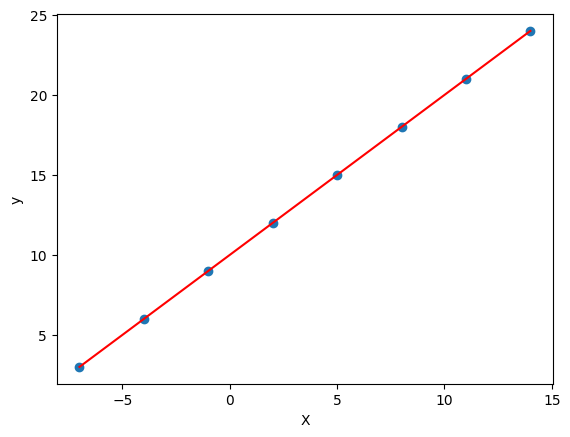

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24. ])

# Visualize
plt.scatter(X, y)
plt.plot(X, y, color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- From graph, it can be seen that, y = X + 10.

X -> input features, independent variable
y -> output feature, dependent variable

## Input and output shapes


In [3]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

## Turn our Numpy array into tensors

In [11]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow


1.   Creating a model - define the input and output layers, as well as the hidden layers of a deep learning
2.   Compiling a model - define  the loss function ( in other words, the function that tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evalution metrics ( what we can use to interpret the performance of our model)
3. Fittin a model - letting the model try to find patterns betwene X & y (features and labels).



In [12]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

# Sequential groups a linear stack of layers into a tf.keras.Model.
# Sequential provides training and inference features on this model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # we have 1 input and want 1 output. that's why it's 1
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae => mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD => stochastic gradient descent
    metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 331ms/step - loss: 11.7646 - mae: 11.7646
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.6321 - mae: 11.6321
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.4996 - mae: 11.4996
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3671 - mae: 11.3671
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2346 - mae: 11.2346


In [13]:
# Check out X, y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Try and make a prediction using our model

In [15]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 54ms/step


array([[11.453941]], dtype=float32)

- Performance of our model is worse than shit. We have to improve it.